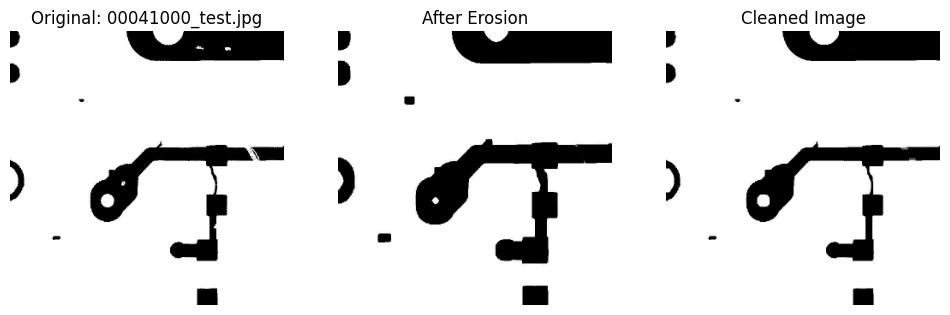

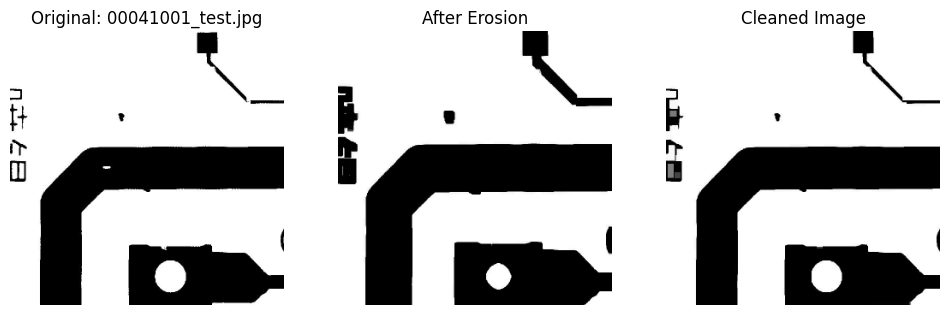

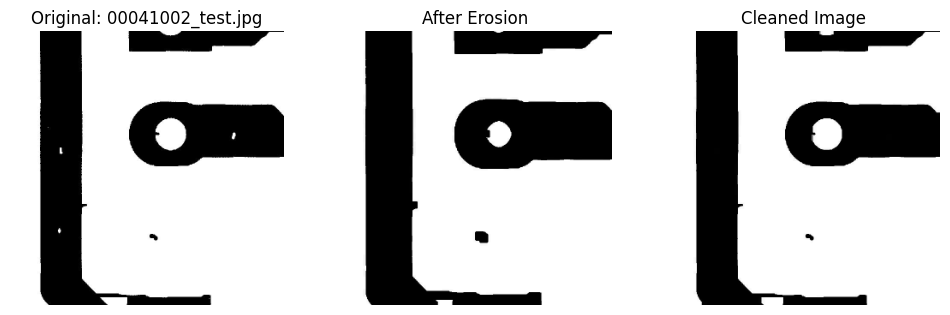

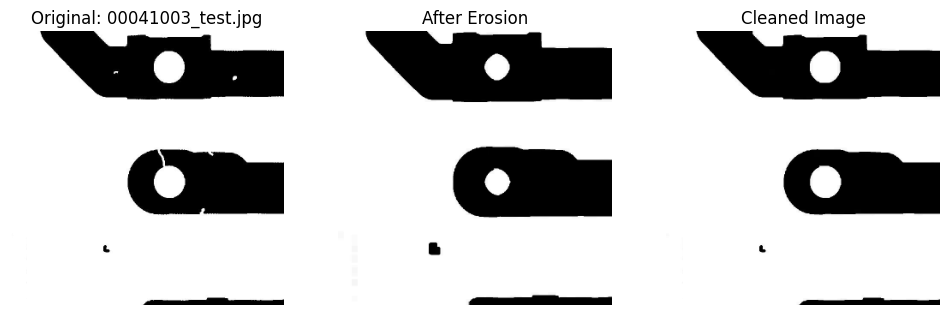

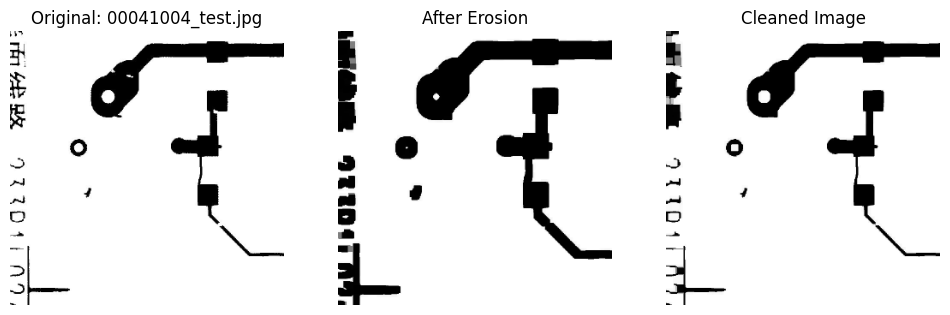

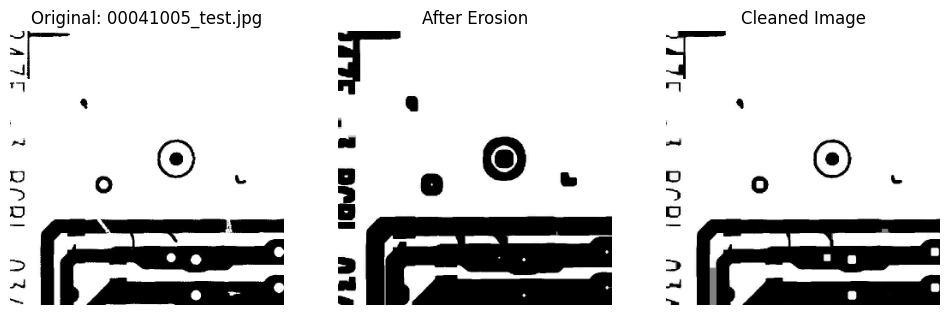

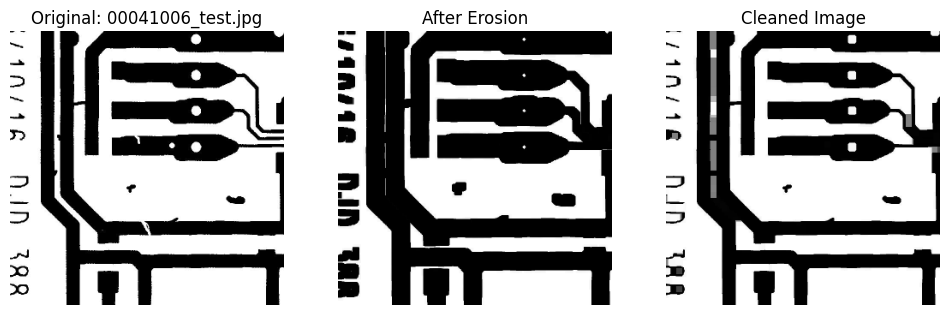

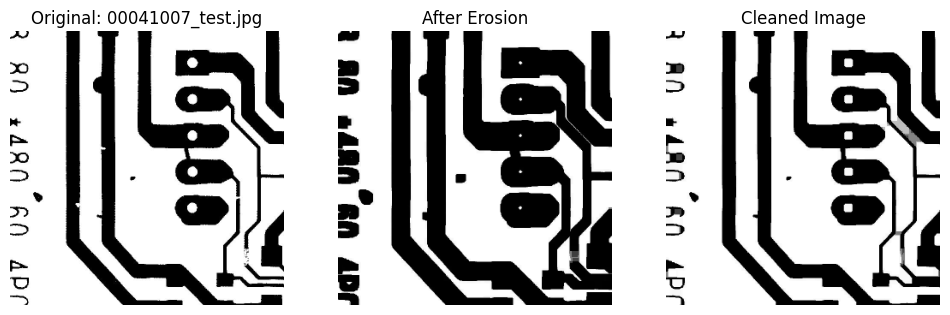

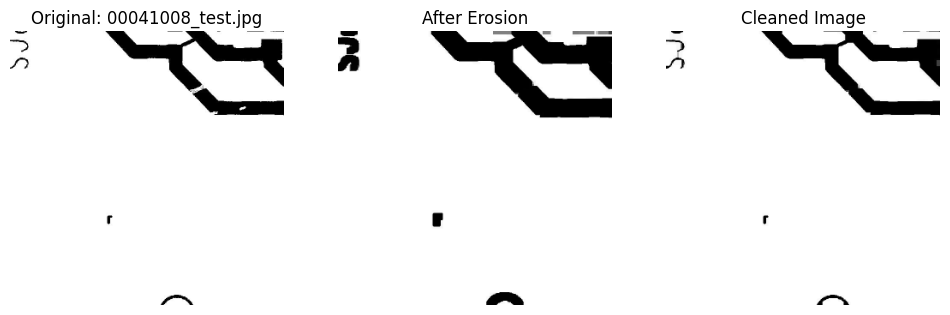

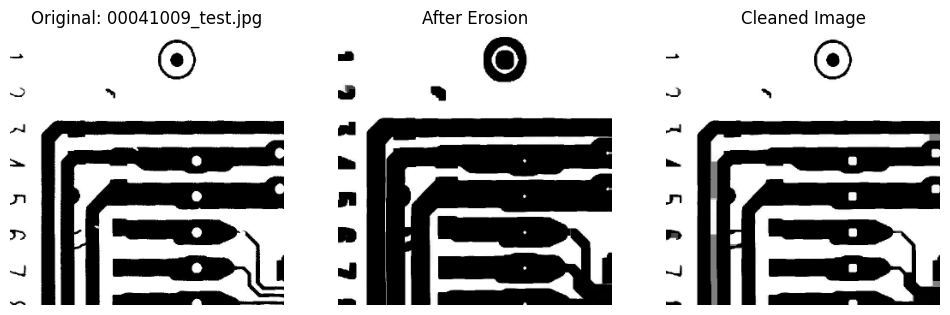

In [39]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Specify the folder path
folder_path = "00041"

# Step 2: List and filter files with "test" in their name
all_files = os.listdir(folder_path)
test_files = [file for file in all_files if "test" in file]
test_files = test_files[:10]

# Step 3: Define the kernel for morphological operations
kernel = np.ones((3, 3), np.uint8)

# Step 4: Process each filtered file
for test_file in test_files:
    file_path = os.path.join(folder_path, test_file)
    
    # Read the image in grayscale
    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Failed to read image: {test_file}")
        continue
    
    # Resize the image for manageability
    resized_image = cv2.resize(image, (0, 0), fx=0.5, fy=0.5)

    # Apply erosion to reduce short circuits
    eroded_image = cv2.erode(resized_image, kernel, iterations=3)

    # Apply dilation to enhance the traces
    cleaned_image = cv2.dilate(eroded_image, kernel, iterations=3)

    # Step 5: Display the results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(resized_image, cmap='gray')
    plt.title(f"Original: {test_file}")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(eroded_image, cmap='gray')
    plt.title("After Erosion")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cleaned_image, cmap='gray')
    plt.title("Cleaned Image")
    plt.axis('off')

    plt.show()
